<a href="https://colab.research.google.com/github/emreguener/Melbourne-Housing-Price-Predictions/blob/main/Melbourne_Housing_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn import model_selection
from sklearn import metrics
from sklearn import ensemble

In [2]:
# reading the file
housing = pd.read_csv("Melbourne_housing_FULL.csv")
df = housing.copy() # We create a copy to preserve the original data


In [3]:
df.head() #The first 5 lines have been checked.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Shape of the dataset (number of rows and columns)
print("The Shape Of The Dataset (Row, Column):", df.shape)

# Number of columns
print("The Column Count Of The Dataset:", df.shape[1])

# Size (total cell count)
print("The Size Of The Dataset (Total Cell Count):", df.size)

The Shape Of The Dataset (Row, Column): (34857, 21)
The Column Count Of The Dataset: 21
The Size Of The Dataset (Total Cell Count): 731997


In [5]:
df.info()  #We found the values of the number of columns, labels of the column, data types of the column, memory usage, range index and the number of cells in each column (non-missing).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Exploratory Data Analysis

In [6]:
df.describe().T #We examined the statistical summary of numeric columns with the df.describe().T statement.

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [7]:
def grab_col_names(dataframe, cat_th=20, car_th=20):
    """
    Provides the names of categorical, numeric, and categorical but cardinal variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numeric but categorical variables
        car_th: int, optinal
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numeric variables
        cat_but_car: list
                List of categorical-looking cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is within cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 34857
Variables: 21
cat_cols: 7
num_cols: 9
cat_but_car: 5
num_but_cat: 4


In [9]:
print("Categorical Variables:{}\nNumeric Variables:{}\nCardinal Variables:{}".format(cat_cols,num_cols,cat_but_car)) #We separated and suppressed the variables according to their types.

Categorical Variables:['Type', 'Method', 'Regionname', 'Rooms', 'Bedroom2', 'Bathroom', 'Car']
Numeric Variables:['Price', 'Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Cardinal Variables:['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


In [10]:
df.duplicated().sum() # We checked for repeating values. And since it returns 1, we said there is one repeated value.

1

In [11]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [12]:
df.drop_duplicates()  # We removed the repeating variable from the data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [13]:
def check_outlier(df, col_name, threshold=2):
    z_scores = (df[col_name] - df[col_name].mean()) / df[col_name].std()
    if (np.abs(z_scores) > threshold).any():
        return True
    else:
        return False

for col in num_cols:
    if check_outlier(df, col):
        print(f"Outliers present: {col}")
    else:
        print(f"No outliers: {col}")



Outliers present: Price
Outliers present: Distance
Outliers present: Postcode
Outliers present: Landsize
Outliers present: BuildingArea
Outliers present: YearBuilt
Outliers present: Lattitude
Outliers present: Longtitude
Outliers present: Propertycount


In [14]:
# Outlier analysis with Z score
def count_outliers_zscore(df, col_name, threshold=2):
    z_scores = (df[col_name] - df[col_name].mean()) / df[col_name].std()
    outliers = np.abs(z_scores) > threshold
    total_count = len(outliers)
    outliers_count = np.sum(outliers)
    percentage = (outliers_count / total_count) * 100 if total_count > 0 else 0
    return total_count, outliers_count, percentage

outlier_info = {}

for col in num_cols:
    total_count, outliers_count, percentage = count_outliers_zscore(df, col)
    outlier_info[col] = (total_count, outliers_count, percentage)

for col, info in outlier_info.items():
    total_count, outliers_count, percentage = info
    print(f"'{col}' There are {total_count} values.{outliers_count} of these are outliers ({percentage:.2f}%).")

'Price' There are 34857 values.1178 of these are outliers (3.38%).
'Distance' There are 34857 values.1639 of these are outliers (4.70%).
'Postcode' There are 34857 values.959 of these are outliers (2.75%).
'Landsize' There are 34857 values.73 of these are outliers (0.21%).
'BuildingArea' There are 34857 values.14 of these are outliers (0.04%).
'YearBuilt' There are 34857 values.712 of these are outliers (2.04%).
'Lattitude' There are 34857 values.1349 of these are outliers (3.87%).
'Longtitude' There are 34857 values.1764 of these are outliers (5.06%).
'Propertycount' There are 34857 values.1238 of these are outliers (3.55%).


In [15]:
def print_large_outliers_in_all_cols(data_frame, num_cols):
    total_outliers = 0

    for col in num_cols:
        z_scores = (data_frame[col] - data_frame[col].mean()) / data_frame[col].std()
        outliers = data_frame[(np.abs(z_scores) > 2)]  #2 is a typical outlier boundary.
        large_outliers = outliers[(outliers[col] >= 2 * data_frame[col].median())]

        total_outliers += len(large_outliers)

        print(f"Outlier Values ({col}):")
        print(large_outliers[[col]])

    print(f"Total Outliers Count : {total_outliers}")

# Let's print outliers that are at least 2 times larger in all numeric columns

print_large_outliers_in_all_cols(df, num_cols)

Outlier Values (Price):
           Price
135    2850000.0
146    2485000.0
152    2615000.0
158    2575000.0
166    3010000.0
...          ...
34529  2760000.0
34623  2610000.0
34632  2500000.0
34714  2855000.0
34719  2685000.0

[1178 rows x 1 columns]
Outlier Values (Distance):
       Distance
14263      35.2
14268      25.0
14313      43.4
14326      34.7
14345      25.9
...         ...
34846      25.5
34847      25.5
34848      25.5
34849      25.5
34850      25.5

[1639 rows x 1 columns]
Outlier Values (Postcode):
Empty DataFrame
Columns: [Postcode]
Index: []
Outlier Values (Landsize):
       Landsize
1198    75100.0
3539    15900.0
4149    10100.0
4415     8680.0
6195    15100.0
...         ...
30772    9198.0
31404   23970.0
32220   40500.0
32577   80000.0
34055   42800.0

[73 rows x 1 columns]
Outlier Values (BuildingArea):
       BuildingArea
1639         1044.0
2296         1041.0
2466         6791.0
2704         3112.0
3780         1561.0
4256         3558.0
4681         1143

In [16]:
#As a result of all these processes, we detected extreme anomalies in the Landsize and BuildingArea variables.

def find_outliers_in_column(data_frame, col_name, threshold=2):
    z_scores = (data_frame[col_name] - data_frame[col_name].mean()) / data_frame[col_name].std()
    outliers = data_frame[(np.abs(z_scores) > threshold)]
    return outliers[col_name]

outliers_landsize = find_outliers_in_column(df, "Landsize")
outliers_buildingarea = find_outliers_in_column(df, "BuildingArea")

print("Outlier Values (Landsize):")
print(outliers_landsize)

print("Outlier Values (BuildingArea):")
print(outliers_buildingarea)

Outlier Values (Landsize):
1198     75100.0
3539     15900.0
4149     10100.0
4415      8680.0
6195     15100.0
          ...   
30772     9198.0
31404    23970.0
32220    40500.0
32577    80000.0
34055    42800.0
Name: Landsize, Length: 73, dtype: float64
Outlier Values (BuildingArea):
1639      1044.0
2296      1041.0
2466      6791.0
2704      3112.0
3780      1561.0
4256      3558.0
4681      1143.0
5992      1022.0
14387     3647.0
15003     4645.0
22531      999.0
22632    44515.0
29036     2002.0
33405     6178.0
Name: BuildingArea, dtype: float64


In [17]:
# Deleting outliers using z score
def remove_outliers_with_zscore(dataframe, variable, z_score_threshold=2):
    z_scores = (dataframe[variable] - dataframe[variable].mean()) / dataframe[variable].std()
    outliers = np.abs(z_scores) > z_score_threshold
    dataframe = dataframe[~outliers]
    return dataframe


# Deleting outliers using z score
for col in num_cols:
    if col != "Price":
        df = remove_outliers_with_zscore(df, col)


In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) # Let's take another look at our data.

Observations: 29001
Variables: 21
cat_cols: 7
num_cols: 9
cat_but_car: 5
num_but_cat: 4


In [19]:
# Find missing values and view the number of missing values for each column
missing_values = df.isna().sum()

# To display missing values by column
print(missing_values)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6410
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7439
Bathroom          7447
Car               7864
Landsize         10022
BuildingArea     18190
YearBuilt        16600
CouncilArea          3
Lattitude         7237
Longtitude        7237
Regionname           3
Propertycount        3
dtype: int64


In [20]:
######################################
# Missing Value Analysis
######################################
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

               n_miss  ratio
BuildingArea    18190  62.72
YearBuilt       16600  57.24
Landsize        10022  34.56
Car              7864  27.12
Bathroom         7447  25.68
Bedroom2         7439  25.65
Lattitude        7237  24.95
Longtitude       7237  24.95
Price            6410  22.10
CouncilArea         3   0.01
Regionname          3   0.01
Propertycount       3   0.01
Distance            1   0.00
Postcode            1   0.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29001 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         29001 non-null  object 
 1   Address        29001 non-null  object 
 2   Rooms          29001 non-null  int64  
 3   Type           29001 non-null  object 
 4   Price          22591 non-null  float64
 5   Method         29001 non-null  object 
 6   SellerG        29001 non-null  object 
 7   Date           29001 non-null  object 
 8   Distance       29000 non-null  float64
 9   Postcode       29000 non-null  float64
 10  Bedroom2       21562 non-null  float64
 11  Bathroom       21554 non-null  float64
 12  Car            21137 non-null  float64
 13  Landsize       18979 non-null  float64
 14  BuildingArea   10811 non-null  float64
 15  YearBuilt      12401 non-null  float64
 16  CouncilArea    28998 non-null  object 
 17  Lattitude      21764 non-null  float64
 18  Longti

In [22]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6410
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7439
Bathroom          7447
Car               7864
Landsize         10022
BuildingArea     18190
YearBuilt        16600
CouncilArea          3
Lattitude         7237
Longtitude        7237
Regionname           3
Propertycount        3
dtype: int64

In [23]:
# Filling in missing data in categorical columns using the mode method.
for column in cat_cols:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6410
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize         10022
BuildingArea     18190
YearBuilt        16600
CouncilArea          3
Lattitude         7237
Longtitude        7237
Regionname           0
Propertycount        3
dtype: int64

## Data Visualization

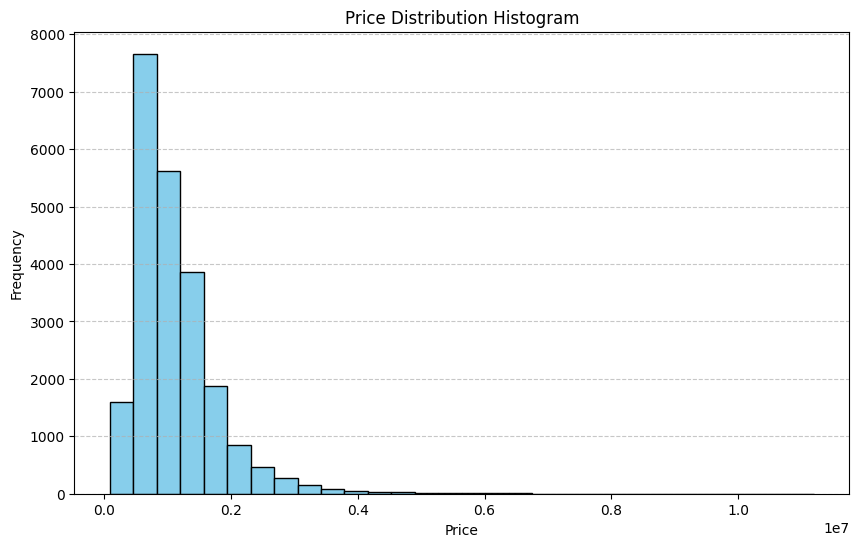

In [24]:
# We create a figure (figure) and adjust its size.
plt.figure(figsize=(10, 6))

# We create the histogram. We use 30 sticks (thousand) and choose 'skyblue' as the color.
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')

# We determine the chart title and labels on the axis.
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

# We show the Y axis with a dashed line.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# We display the histogram.
plt.show()

              Price         Price
count  2.259100e+04  2.259100e+04
mean   1.099956e+06  1.099956e+06
std    6.498930e+05  6.498930e+05
min    8.500000e+04  8.500000e+04
25%    6.700000e+05  6.700000e+05
50%    9.260000e+05  9.260000e+05
75%    1.350000e+06  1.350000e+06
max    1.120000e+07  1.120000e+07


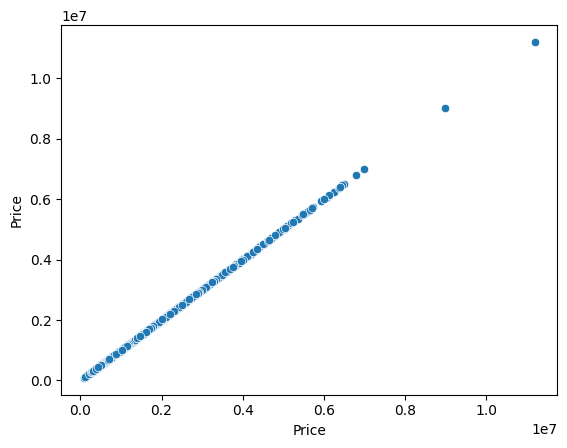

           Distance         Price
count  29000.000000  2.259100e+04
mean       9.434966  1.099956e+06
std        4.417267  6.498930e+05
min        0.700000  8.500000e+04
25%        6.100000  6.700000e+05
50%        9.200000  9.260000e+05
75%       12.700000  1.350000e+06
max       24.700000  1.120000e+07


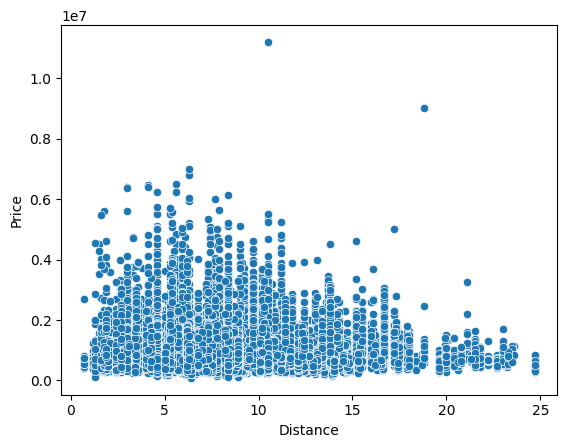

           Postcode         Price
count  29000.000000  2.259100e+04
mean    3101.466345  1.099956e+06
std       58.545702  6.498930e+05
min     3002.000000  8.500000e+04
25%     3047.000000  6.700000e+05
50%     3102.000000  9.260000e+05
75%     3147.000000  1.350000e+06
max     3207.000000  1.120000e+07


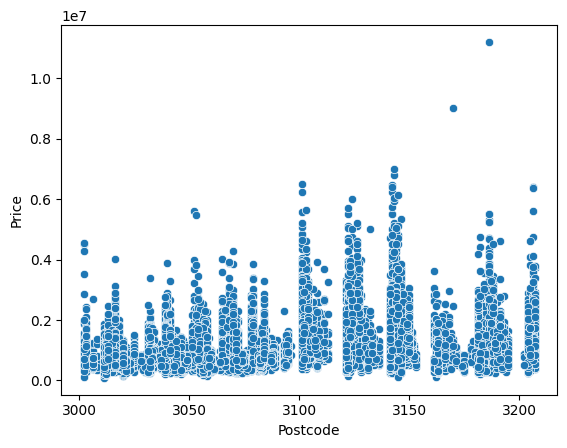

           Landsize         Price
count  18979.000000  2.259100e+04
mean     481.383635  1.099956e+06
std      466.873839  6.498930e+05
min        0.000000  8.500000e+04
25%      199.000000  6.700000e+05
50%      465.000000  9.260000e+05
75%      657.000000  1.350000e+06
max     6712.000000  1.120000e+07


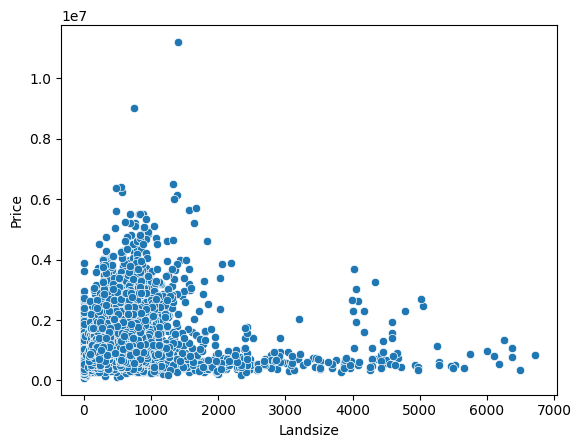

       BuildingArea         Price
count  10811.000000  2.259100e+04
mean     146.623337  1.099956e+06
std       72.547094  6.498930e+05
min        0.000000  8.500000e+04
25%       98.000000  6.700000e+05
50%      132.000000  9.260000e+05
75%      182.000000  1.350000e+06
max      419.000000  1.120000e+07


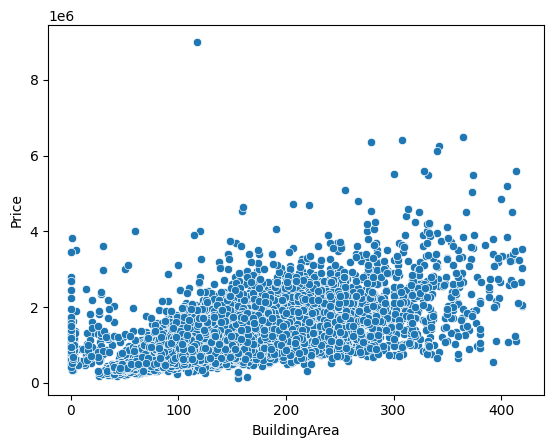

          YearBuilt         Price
count  12401.000000  2.259100e+04
mean    1962.240303  1.099956e+06
std       36.094229  6.498930e+05
min     1889.000000  8.500000e+04
25%     1935.000000  6.700000e+05
50%     1965.000000  9.260000e+05
75%     1996.000000  1.350000e+06
max     2019.000000  1.120000e+07


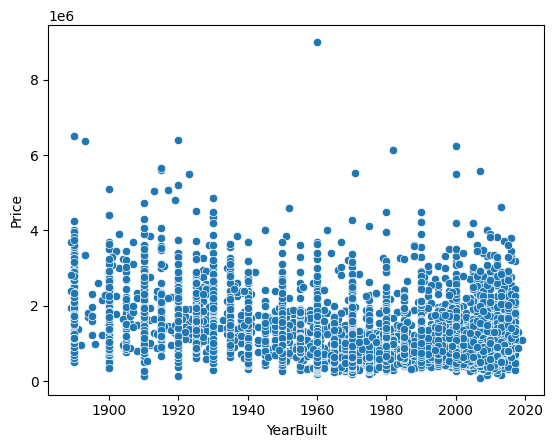

          Lattitude         Price
count  21764.000000  2.259100e+04
mean     -37.810284  1.099956e+06
std        0.066950  6.498930e+05
min      -37.962600  8.500000e+04
25%      -37.857100  6.700000e+05
50%      -37.807495  9.260000e+05
75%      -37.760832  1.350000e+06
max      -37.655320  1.120000e+07


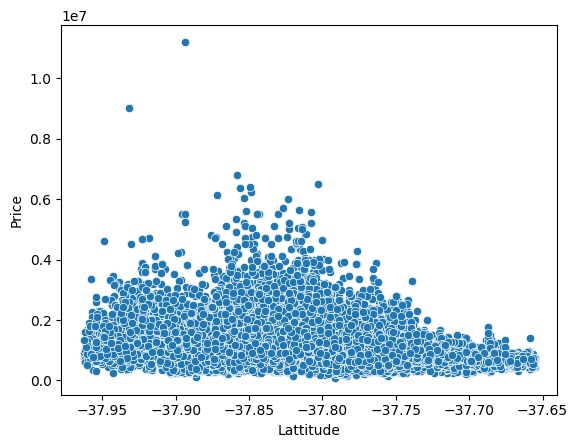

         Longtitude         Price
count  21764.000000  2.259100e+04
mean     145.001835  1.099956e+06
std        0.087296  6.498930e+05
min      144.785510  8.500000e+04
25%      144.939700  6.700000e+05
50%      145.005245  9.260000e+05
75%      145.063353  1.350000e+06
max      145.211290  1.120000e+07


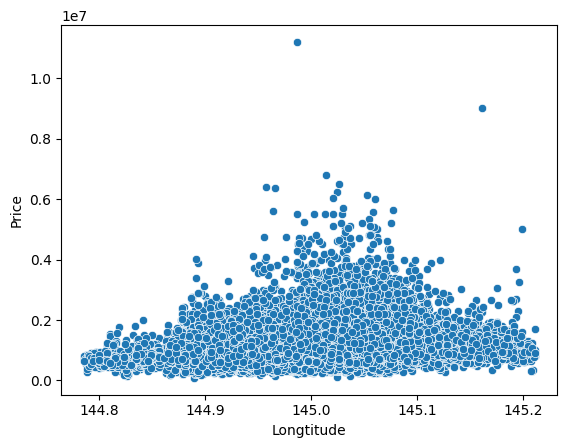

       Propertycount         Price
count   28998.000000  2.259100e+04
mean     6996.919926  1.099956e+06
std      3628.310762  6.498930e+05
min       389.000000  8.500000e+04
25%      4280.000000  6.700000e+05
50%      6543.000000  9.260000e+05
75%      9028.000000  1.350000e+06
max     16166.000000  1.120000e+07


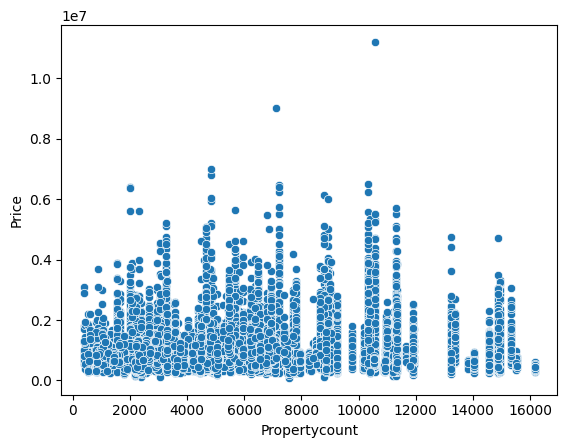

In [25]:
def num_summary(dataframe, col_name, dependent_variable="Price", plot=False):
    # Statistical summaries of numerical variable
    summary_df = dataframe[[col_name, dependent_variable]].describe()

    print(summary_df)

    # for graphic drawing
    if plot:
        sns.scatterplot(x=col_name, y=dependent_variable, data=dataframe)
        plt.show()

# Analysis of numerical variables according to dependent variable
for col in num_cols:
    num_summary(df, col, dependent_variable="Price", plot=True)

In [26]:
def target_summary_with_num(dataframe, target, numeric_col):
    summary_df = dataframe.groupby(numeric_col)[target].mean().sort_values(ascending=False)
    print(pd.DataFrame({"TARGET_MEAN": summary_df}), end="\n\n\n")

# More detailed analysis of numerical variables according to the dependent variable
for col in num_cols:
    target_summary_with_num(df, "Price", col)

            TARGET_MEAN
Price                  
11200000.0   11200000.0
9000000.0     9000000.0
7000000.0     7000000.0
6800000.0     6800000.0
6500000.0     6500000.0
...                 ...
145000.0       145000.0
131000.0       131000.0
121000.0       121000.0
112000.0       112000.0
85000.0         85000.0

[2699 rows x 1 columns]


           TARGET_MEAN
Distance              
9.0       2.074409e+06
5.6       1.802725e+06
5.4       1.767501e+06
7.4       1.754872e+06
3.0       1.752500e+06
...                ...
24.7      5.518593e+05
20.6      5.413167e+05
19.6      5.328583e+05
18.4      5.132685e+05
17.4      4.747500e+05

[159 rows x 1 columns]


           TARGET_MEAN
Postcode              
3126.0    2.292802e+06
3206.0    2.017896e+06
3144.0    1.990820e+06
3186.0    1.924466e+06
3103.0    1.855848e+06
...                ...
3047.0    5.376181e+05
3076.0    5.328583e+05
3061.0    5.164118e+05
3029.0    5.132685e+05
3048.0    4.747500e+05

[149 rows x 1 columns]


          T

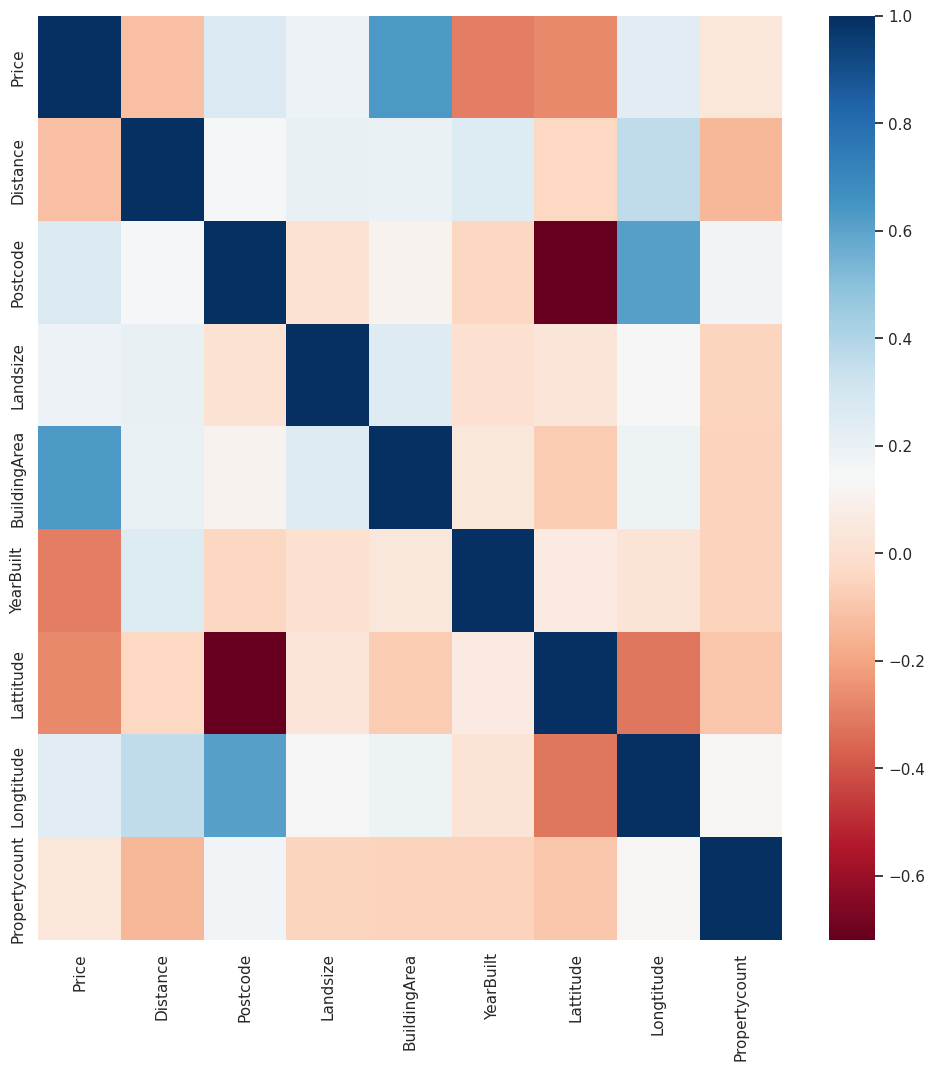

['Bedroom2', 'BuildingArea', 'Lattitude']

In [27]:
######################################
# Analysis of Correlation
######################################

corr = df[num_cols].corr()
corr

# Displaying Correlations
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    numerical_columns = dataframe.select_dtypes(include=[np.number])
    corr = numerical_columns.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()

    return drop_list

high_correlated_cols(df, plot=False)

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) # overview
df.head()

Observations: 29001
Variables: 21
cat_cols: 7
num_cols: 9
cat_but_car: 5
num_but_cat: 4


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Encode Operations and Model Selection

In [29]:
Df_Model = df.copy()

In [30]:
Df_Model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29001 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         29001 non-null  object 
 1   Address        29001 non-null  object 
 2   Rooms          29001 non-null  int64  
 3   Type           29001 non-null  object 
 4   Price          22591 non-null  float64
 5   Method         29001 non-null  object 
 6   SellerG        29001 non-null  object 
 7   Date           29001 non-null  object 
 8   Distance       29000 non-null  float64
 9   Postcode       29000 non-null  float64
 10  Bedroom2       29001 non-null  float64
 11  Bathroom       29001 non-null  float64
 12  Car            29001 non-null  float64
 13  Landsize       18979 non-null  float64
 14  BuildingArea   10811 non-null  float64
 15  YearBuilt      12401 non-null  float64
 16  CouncilArea    28998 non-null  object 
 17  Lattitude      21764 non-null  float64
 18  Longti

In [31]:
print(Df_Model.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [32]:
obj_cols = [obj for obj in Df_Model.select_dtypes(['object']).columns]
obj_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [33]:
for col in obj_cols:
  Df_Model[col] = Df_Model[col].astype('category')

In [34]:
category_columns = Df_Model.select_dtypes(['category']).columns
print(Df_Model.select_dtypes(['category']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [35]:
Df_Model.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6410
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize         10022
BuildingArea     18190
YearBuilt        16600
CouncilArea          3
Lattitude         7237
Longtitude        7237
Regionname           0
Propertycount        3
dtype: int64

In [36]:
Df_Model.info() #overview

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29001 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         29001 non-null  category
 1   Address        29001 non-null  category
 2   Rooms          29001 non-null  int64   
 3   Type           29001 non-null  category
 4   Price          22591 non-null  float64 
 5   Method         29001 non-null  category
 6   SellerG        29001 non-null  category
 7   Date           29001 non-null  category
 8   Distance       29000 non-null  float64 
 9   Postcode       29000 non-null  float64 
 10  Bedroom2       29001 non-null  float64 
 11  Bathroom       29001 non-null  float64 
 12  Car            29001 non-null  float64 
 13  Landsize       18979 non-null  float64 
 14  BuildingArea   10811 non-null  float64 
 15  YearBuilt      12401 non-null  float64 
 16  CouncilArea    28998 non-null  category
 17  Lattitude      21764 non-null  

In [37]:
sample_before_onehot = Df_Model.copy()

In [38]:
sample_before_onehot = pd.get_dummies(data=sample_before_onehot, columns=["Method"])
sample_before_onehot

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,...,Propertycount,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,Abbotsford,68 Studley St,2,h,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,...,4019.0,0,0,0,0,0,0,1,0,0
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,...,4019.0,0,0,1,0,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,...,4019.0,0,0,1,0,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,u,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,...,4019.0,0,0,0,0,0,0,0,1,0
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,Jas,24/02/2018,6.3,3013.0,4.0,...,6543.0,1,0,0,0,0,0,0,0,0
34853,Yarraville,29A Murray St,2,h,888000.0,Sweeney,24/02/2018,6.3,3013.0,2.0,...,6543.0,0,0,0,0,0,1,0,0,0
34854,Yarraville,147A Severn St,2,t,705000.0,Jas,24/02/2018,6.3,3013.0,2.0,...,6543.0,0,0,1,0,0,0,0,0,0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,hockingstuart,24/02/2018,6.3,3013.0,3.0,...,6543.0,0,0,0,0,0,1,0,0,0


In [39]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    df = label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [40]:
labelEncoder = LabelEncoder()
df["SellerG"] = labelEncoder.fit_transform(df["SellerG"])
df["SellerG"].value_counts()

138    3245
197    3011
18     2299
315    2121
174    1944
       ... 
280       1
102       1
108       1
62        1
331       1
Name: SellerG, Length: 332, dtype: int64

In [41]:
sample_before_onehot["Type"] = labelEncoder.fit_transform(sample_before_onehot["Type"])
sample_before_onehot["Type"].value_counts()

0    19085
2     6636
1     3280
Name: Type, dtype: int64

In [42]:
sample_before_onehot["Regionname"] = labelEncoder.fit_transform(sample_before_onehot["Regionname"])
sample_before_onehot["Regionname"].value_counts()


4    11412
1     7551
5     5654
0     3648
3      701
2       35
Name: Regionname, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29001 entries, 0 to 34856
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 29001 non-null  object 
 1   Address                                29001 non-null  object 
 2   Price                                  22591 non-null  float64
 3   SellerG                                29001 non-null  int64  
 4   Date                                   29001 non-null  object 
 5   Distance                               29000 non-null  float64
 6   Postcode                               29000 non-null  float64
 7   Landsize                               18979 non-null  float64
 8   BuildingArea                           10811 non-null  float64
 9   YearBuilt                              12401 non-null  float64
 10  CouncilArea                            28998 non-null  object 
 11  La

In [44]:
numeric_columns = df.select_dtypes(include = ['float64','int64']).columns
numeric_columns

Index(['Price', 'SellerG', 'Distance', 'Postcode', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

In [45]:
print(df.select_dtypes(include=['int64', 'float64']).columns)

Index(['Price', 'SellerG', 'Distance', 'Postcode', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')


In [46]:
categorical_columns = df.select_dtypes(["object"]).columns.tolist()
unneccessary_columns = ['Postcode', 'Lattitude',
                         "SellerG", 'YearBuilt']
label = ['Price']
categorical_columns

['Suburb', 'Address', 'Date', 'CouncilArea']

In [47]:
df.isna().sum()

Suburb         0
Address        0
Price       6410
SellerG        0
Date           0
            ... 
Car_7.0        0
Car_8.0        0
Car_9.0        0
Car_10.0       0
Car_11.0       0
Length: 73, dtype: int64

In [48]:
last_data = df[df["Price"].isna() != True ]
for column in ["BuildingArea", "YearBuilt", "CouncilArea", "Landsize", "Lattitude", "Longtitude", "Propertycount"]:
    last_data = last_data[last_data[column].isna() != True]

last_data.head()

,Suburb,Address,Price,SellerG,Date,Distance,Postcode,Landsize,BuildingArea,YearBuilt,...,Car_2.0,Car_3.0,Car_4.0,Car_5.0,Car_6.0,Car_7.0,Car_8.0,Car_9.0,Car_10.0,Car_11.0
2,Abbotsford,25 Bloomburg St,1035000.0,28,4/02/2016,2.5,3067.0,156.0,79.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,5 Charles St,1465000.0,28,4/03/2017,2.5,3067.0,134.0,150.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
6,Abbotsford,55a Park St,1600000.0,197,4/06/2016,2.5,3067.0,120.0,142.0,2014.0,...,1,0,0,0,0,0,0,0,0,0
11,Abbotsford,124 Yarra St,1876000.0,197,7/05/2016,2.5,3067.0,245.0,210.0,1910.0,...,0,0,0,0,0,0,0,0,0,0
14,Abbotsford,98 Charles St,1636000.0,197,8/10/2016,2.5,3067.0,256.0,107.0,1890.0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
X = last_data.drop(categorical_columns + unneccessary_columns + label, axis=1)

X.head().columns

Index(['Distance', 'Landsize', 'BuildingArea', 'Longtitude', 'Propertycount',
       'Type_t', 'Type_u', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Rooms_2', 'Rooms_3', 'Rooms_4', 'Rooms_5', 'Rooms_6', 'Rooms_7',
       'Rooms_8', 'Rooms_9', 'Rooms_10', 'Rooms_12', 'Rooms_16',
       'Bedroom2_1.0', 'Bedroom2_2.0', 'Bedroom2_3.0', 'Bedroom2_4.0',
       'Bedroom2_5.0', 'Bedroom2_6.0', 'Bedroom2_7.0', 'Bedroom2_8.0',
       'Bedroom2_9.0', 'Bedroom2_10.0', 'Bedroom2_16.0', 'Bedroom2_20.0',
       'Bedroom2_30.0', 'Bathroom_1.0', 'Bathroom_2.0', 'Bathroom_3.0',
       'Bathroom_4.0', 'Bathroom_5.0', 'Bathroom_6.0', 'Bathroom_7.0',
       'Bathroom_8.0', 'Bathroom_12.0', 'Car_1.0', 'Car_2.0', 'Car_3.0',
       'Car_4.0

In [50]:
y = last_data["Price"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
# Shape of training data
print("X_train shape: {}".format(X_train.shape))
# Shape of testing data
print("X_test shape: {}".format(X_test.shape))
# Shape of labels for training
print("y_train shape: {}".format(y_train.shape))
# Shape of labels for testing
print("y_test shape: {}".format(y_test.shape))

X_train shape: (5808, 64)
X_test shape: (1452, 64)
y_train shape: (5808,)
y_test shape: (1452,)


In [53]:
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
},
}

In [54]:
for model_name, model_info in models.items():
    model = model_info['model']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("-*-*-*-*-*-*-*-*-*-*-*-*")
    print(f"Model: {model_name}")
    print("MAE ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.846e+14, tolerance: 2.596e+11
  model = cd_fast.enet_coordinate_descent(


-*-*-*-*-*-*-*-*-*-*-*-*
Model: Lasso
MAE  258307.85761246036
MSE:  149794390055.44095
RMSE:  387032.8022990312
R2:  0.6651486142646086

-*-*-*-*-*-*-*-*-*-*-*-*
Model: LinearRegression
MAE  258301.57523144432
MSE:  149789362228.108
RMSE:  387026.3068941283
R2:  0.6651598535036019

-*-*-*-*-*-*-*-*-*-*-*-*
Model: Ridge
MAE  258543.72267323703
MSE:  149660887435.22366
RMSE:  386860.29446716764
R2:  0.665447046918612

-*-*-*-*-*-*-*-*-*-*-*-*
Model: ElasticNet
MAE  299758.5992157263
MSE:  195141918129.18826
RMSE:  441748.70472836506
R2:  0.5637784453981458

-*-*-*-*-*-*-*-*-*-*-*-*
Model: KNeighborsRegressor
MAE  273359.84407713497
MSE:  186549772841.9303
RMSE:  431914.0803932309
R2:  0.582985384688818

-*-*-*-*-*-*-*-*-*-*-*-*
Model: RandomForestRegressor
MAE  181946.01282205168
MSE:  84375974570.35587
RMSE:  290475.4285139379
R2:  0.8113853796714228

-*-*-*-*-*-*-*-*-*-*-*-*
Model: GradientBoostingRegressor
MAE  197980.76491909628
MSE:  92155171215.87427
RMSE:  303570.70216981455
R2:  

## Random Forest Is The Best In R2 Scores